In [1]:
# Suppress specific warnings in Jupyter Lab
import warnings

# Suppress the UserWarning from numpy regarding 'longdouble'
warnings.filterwarnings("ignore", category=UserWarning, module="numpy._core.getlimits")

# Your imports and other code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
import os
print(os.getcwd())

/mnt/c/Users/HP/Desktop/Life4138-coursework


In [4]:
# 1. Read the dataset
data = pd.read_csv("/mnt/c/Users/HP/Desktop/Life4138-coursework/pumpkins_10 (1).csv")

In [11]:
print(data.head())

       id  place   weight_lbs grower_name         city  state_prov country  \
0  2490-P     86  2023.425903       LASCQ  Los Angeles  California   China   
1  2648-P     13  1982.059920       GTAFP        Paris       Texas      UK   
2  2329-P     86  1901.112797       BVKFK      Houston     Florida     USA   
3  2367-P     14  1879.817456       QJVTR      Houston    New York   China   
4  2459-P     40  1808.952018       DWGQC      Chicago     Florida     USA   

                    gpc_site seed_mother pollinator_father  ott  est_weight  \
0  National Pumpkin Festival      1450 H            1848 S  479        2002   
1  Regional Pumpkin Festival      1580 R            1279 D  456        1811   
2     Local Pumpkin Festival      1494 O            1496 D  444        1748   
3  National Pumpkin Festival      1040 X            1531 A  435        1666   
4  National Pumpkin Festival      1607 N            1047 L  428        1610   

   pct_chart         variety   weight_kg weight_class  


In [16]:
heaviest_pumpkin = data.loc[data['weight_lbs'].idxmax()]
print("\nHeaviest Pumpkin Details:")
print(f"Weight (lbs): {heaviest_pumpkin['weight_lbs']}")
print(f"Variety: {heaviest_pumpkin['variety']}")
print(f"Location: {heaviest_pumpkin['city']}, {heaviest_pumpkin['state_prov']}, {heaviest_pumpkin['country']}")
print(f"Year: {heaviest_pumpkin['id'][:4]}")


Heaviest Pumpkin Details:
Weight (lbs): 2705.614652628638
Variety: Golden Hubbard
Location: Houston, Florida, Mexico
Year: 2454


In [6]:
# 3. Function to convert weight to kilograms
def lbs_to_kg(weight_lbs):
    return weight_lbs * 0.453592

data['weight_kg'] = data['weight_lbs'].apply(lbs_to_kg)

In [7]:
# 4. Create weight class column
thresholds = [0, 500, 1000, float('inf')]
labels = ['light', 'medium', 'heavy']
data['weight_class'] = pd.cut(data['weight_lbs'], bins=thresholds, labels=labels)

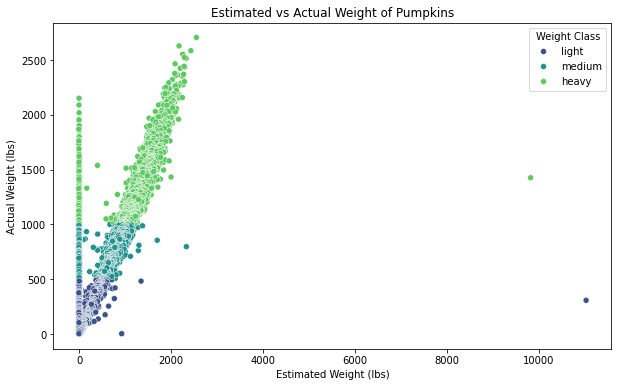

In [8]:
# 5. Plot estimated weight vs actual weight
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['est_weight'], y=data['weight_lbs'], hue=data['weight_class'], palette="viridis"
)
plt.title("Estimated vs Actual Weight of Pumpkins")
plt.xlabel("Estimated Weight (lbs)")
plt.ylabel("Actual Weight (lbs)")
plt.legend(title="Weight Class")
plt.savefig("estimated_vs_actual_weight.png")
plt.show()

In [22]:
# 6. Filter data for three countries
countries = ["USA", "UK", "China"]
filtered_data = data[data['country'].isin(countries)]
filtered_data.to_csv("pumpkins_filtered.csv", index=False)

In [23]:
# 7. Summarise filtered dataset
mean_weights_by_country = filtered_data.groupby('country')['weight_lbs'].mean()
mean_weights_by_variety = filtered_data.groupby(['country', 'variety'])['weight_lbs'].mean()
print(mean_weights_by_country)
print(mean_weights_by_variety)

country
China    774.161283
UK       785.512086
USA      774.187512
Name: weight_lbs, dtype: float64
country  variety       
China    Golden Hubbard    770.506528
         Kakai             736.759300
         Munchkin          814.714289
         Orange Bulldog    771.909745
UK       Golden Hubbard    780.314679
         Kakai             806.971527
         Munchkin          764.233654
         Orange Bulldog    792.204475
USA      Golden Hubbard    769.222271
         Kakai             735.050498
         Munchkin          810.858059
         Orange Bulldog    784.828556
Name: weight_lbs, dtype: float64


/tmp/ipykernel_5509/1228621641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='weight_lbs', data=filtered_data, palette="pastel")


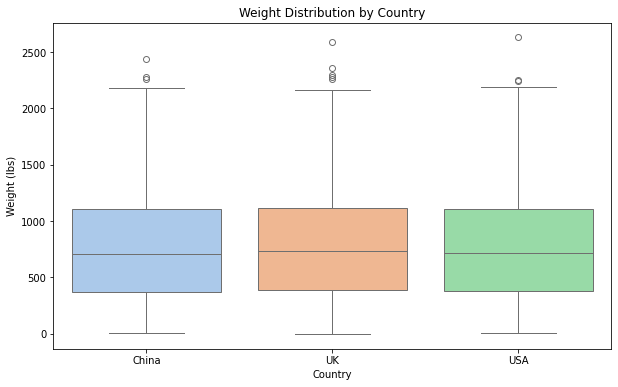

In [24]:
# 8. Boxplot for weight distribution by country
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='weight_lbs', data=filtered_data, palette="pastel")
plt.title("Weight Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Weight (lbs)")
plt.savefig("weight_distribution_boxplot.png")
plt.show()

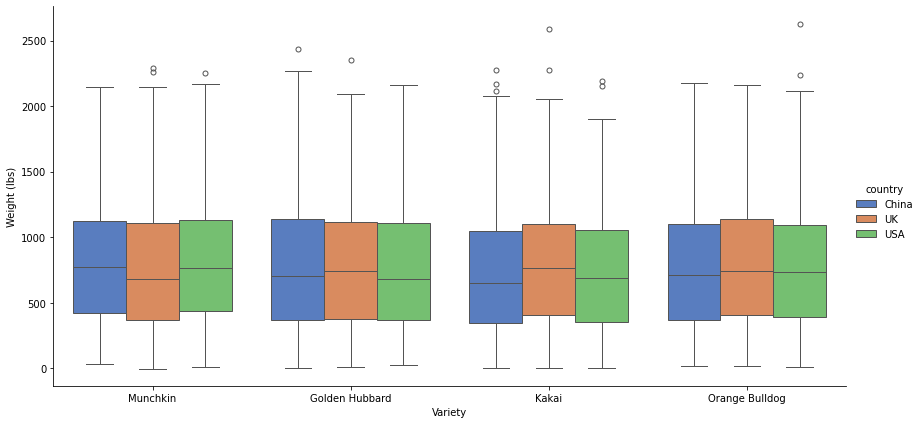

In [25]:
# 9. Facet plot for weight by variety
facet = sns.catplot(
    data=filtered_data, x='variety', y='weight_lbs', hue='country', kind='box',
    height=6, aspect=2, palette="muted"
)
facet.set_titles("Weight by Variety")
facet.set_axis_labels("Variety", "Weight (lbs)")
facet.savefig("facet_plot_by_variety.png")
plt.show()